# Non-Ergodic Dynamics in Multiplicative Systems

In many stochastic systems, growth occurs multiplicatively rather than additively.
Such systems exhibit fundamentally different long-term behavior, where ensemble averages
diverge from time-averaged outcomes experienced by individual trajectories.

This notebook investigates the following question:

> Why do most trajectories in multiplicative systems lose value over time,
> despite the existence of rare paths with extremely high returns?

Using Monte Carlo simulation and binomial (CRR) trees, we demonstrate that:
1. Log-growth, not expected value, governs long-term outcomes.
2. Increased volatility amplifies the divergence between mean and median wealth.
3. Value in option pricing is dominated by rare, extreme states rather than typical outcomes.

The analysis proceeds in three stages: simulation of wealth processes,
analytical examination of log-growth, and state-space analysis via binomial trees.

```

Phase I: Scope, Assumptions & Interpretation Rules
├── define multiplicative system under study
├── clarify simulation-based (no external data)
├── distinguish ensemble vs time-average perspective
└── state non-goals (no market prediction, no strategy optimization)

Phase II: Multiplicative Wealth Process Setup
├── define wealth dynamics and return distributions
├── specify volatility regimes (low / medium / high)
├── define horizon lengths and number of paths
└── establish baseline expectations

Phase III: Monte Carlo Dynamics & Path-Level Behavior
├── simulate wealth trajectories across regimes
├── visualize path fan charts
├── inspect distributional spread over time
└── identify early divergence between paths

Phase IV: Ensemble vs Time-Average Outcomes
├── compute mean, median, and quantiles of wealth
├── compare ensemble average vs typical trajectory
├── analyze survival vs extinction behavior
└── demonstrate non-ergodicity empirically

Phase V: Log-Growth & Volatility Drag Analysis
├── compute expected log-growth analytically
├── relate volatility to growth degradation
├── contrast additive vs multiplicative accumulation
└── reconcile theory with simulation outcomes

Phase VI: Binomial / CRR Tree as State Space
├── construct recombining binomial (CRR) tree
├── interpret nodes as states, not probabilities
├── assign transition probabilities
└── examine state-space geometry over time

Phase VII: Probability, Value & Contribution Decomposition
├── compute probability mass per node
├── compute payoff / wealth per node
├── measure contribution to expectation
└── contrast high-probability vs high-impact states

Phase VIII: Wealth Dynamics ↔ Option Pricing Analogy
├── map wealth paths to price paths
├── relate rare extreme paths to option value
├── interpret volatility asymmetry
└── explain why tails dominate valuation

Phase IX: Synthesis & Structural Insights
├── summarize non-ergodic mechanisms observed
├── articulate volatility–survival trade-off
├── clarify limits of expectation-based reasoning
└── outline implications for stochastic modeling


```

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

from src import (
    generate_returns,
    simulate_wealth,
    volatility_regimes,
    run_monte_carlo,
    wealth_distribution_stats,
    time_average_log_growth,
    ensemble_arithmetic_growth,
    compare_growth_measures,
    survival_probability,
    terminal_extinction_rate,
    terminal_log_wealth_stats,
    gini_coefficient,
    terminal_inequality,
    crr_params,
    build_crr_tree,
    node_probabilities,
    level_expectations,
    expectation_contributions,
    terminal_tail_dominance,
    run_crr_state_space,
    plot_fan_chart,
    plot_mean_median,
    plot_terminal_log_distribution,
    plot_survival_curve,
    plot_crr_contribution_heatmap,
    plot_crr_expectation,
)

# Phase I — Scope, Assumptions, and Interpretation

## 1. Multiplicative Wealth Dynamics

Trong nghiên cứu này, ta xem xét một hệ tăng trưởng **nhân** theo thời gian, trong đó giá trị tài sản được cập nhật theo quy tắc:

$$
W_{t+1} = W_t \cdot R_t
$$

với:

- $( W_t)$: tài sản tại thời điểm $( t )$
- $( R_t)$: tỷ suất sinh lợi ngẫu nhiên tại thời điểm $( t )$

Sau \( T \) bước thời gian:

$$
W_T = W_0 \prod_{t=1}^{T} R_t
$$

Dưới dạng log:

$$
\log W_T = \log W_0 + \sum_{t=1}^{T} \log R_t
$$

Biểu diễn log cho thấy **tăng trưởng dài hạn** được quyết định bởi **kỳ vọng của log-return**,
không phải bởi kỳ vọng của return thông thường.
Đây là điểm khởi đầu cho hiện tượng **non-ergodicity trong hệ nhân**.


 ## 2. Simulation-Based Methodology

Notebook này sử dụng **mô phỏng Monte Carlo thuần túy** để nghiên cứu động lực học của hệ tăng trưởng nhân.

Các đặc điểm chính:

- Không sử dụng dữ liệu thị trường thực.
- Không thực hiện dự báo giá.
- Không tối ưu chiến lược đầu tư.
- Chỉ tập trung vào **cấu trúc xác suất nội tại** của quá trình tăng trưởng ngẫu nhiên.

Cách tiếp cận này cho phép:

- tách biệt hoàn toàn yếu tố toán học khỏi nhiễu dữ liệu thực,
- quan sát trực tiếp sự phân kỳ giữa các quỹ đạo tài sản,
- kiểm chứng thực nghiệm các kết quả lý thuyết về log-growth và non-ergodicity.


## 3. Ensemble vs Time-Average Perspective

Trong các hệ cộng (*additive systems*), trung bình theo quần thể (*ensemble average*)
và trung bình theo thời gian (*time average*) thường trùng nhau.

Tuy nhiên, với hệ tăng trưởng **nhân**, hai đại lượng này khác biệt cơ bản:

- **Ensemble expectation**:

  $$
  \mathbb{E}[W_T]
  $$

  bị chi phối bởi các quỹ đạo hiếm nhưng có giá trị cực lớn.

- **Time-average growth**:

  $$
  \mathbb{E}[\log R]
  $$

  mới là đại lượng quyết định trải nghiệm dài hạn của **một quỹ đạo điển hình**.

Sự không tương đương này chính là biểu hiện của:

> **Non-ergodicity trong động lực học nhân.**


## 4. Non-Goals and Interpretation Limits

Nghiên cứu này **không nhằm mục đích**:

- dự đoán thị trường tài chính,
- đề xuất chiến lược đầu tư,
- định giá tài sản thực,
- đưa ra khuyến nghị tài chính.

Thay vào đó, mục tiêu duy nhất là:

> phân tích **cơ chế toán học và xác suất** của tăng trưởng ngẫu nhiên nhân,
> cùng các hệ quả cấu trúc như non-ergodicity, volatility drag,
> và sự chi phối của các trạng thái hiếm trong kỳ vọng.

Mọi diễn giải tài chính (nếu có) chỉ mang tính **ẩn dụ cấu trúc**,
không phải kết luận thực nghiệm về thị trường.


# Phase II — Multiplicative Wealth Process Setu

## 1. Modeling Objectives

Mục tiêu của Phase II là thiết lập **cấu trúc định lượng tối thiểu** cho hệ tăng trưởng nhân,
làm nền tảng cho mô phỏng Monte Carlo ở các pha tiếp theo.

Cụ thể, ta cần:

- xác định phân phối của return ngẫu nhiên,
- định nghĩa các mức biến động (volatility regimes),
- chọn độ dài thời gian quan sát (time horizon),
- xác định số lượng quỹ đạo mô phỏng (number of paths).

Phase này **chỉ thiết lập tham số**, chưa thực hiện phân tích thống kê hay kết luận.


## 2. Return Distribution Assumption

Ta giả định mỗi bước thời gian có một tỷ suất sinh lợi ngẫu nhiên $( R_t )$,
độc lập và phân phối giống nhau (i.i.d).

Hai cách mô hình hóa phổ biến:

### (1) Lognormal return

$$
R_t = \exp(\mu - \tfrac{1}{2}\sigma^2 + \sigma Z_t), \quad Z_t \sim \mathcal{N}(0,1)
$$

- Đảm bảo $( R_t > 0 )$
- Phù hợp với hệ tăng trưởng nhân liên tục
- Liên hệ trực tiếp với log-growth lý thuyết

### (2) Arithmetic normal return

$$
R_t = 1 + \mu + \sigma Z_t
$$

- Đơn giản về mặt mô phỏng
- Có thể cho giá trị âm nếu biến động lớn
- Chủ yếu dùng để so sánh cấu trúc toán học

Trong notebook này, **lognormal return là mô hình chính**.


## 3. Volatility Regimes

Biến động $( \sigma )$ đóng vai trò trung tâm trong hiện tượng non-ergodicity.

Ta xét ba chế độ chuẩn:

- **Low volatility**: dao động nhỏ, log-growth gần với kỳ vọng thường.
- **Medium volatility**: bắt đầu xuất hiện phân kỳ giữa mean và median.
- **High volatility**: volatility drag mạnh, phần lớn quỹ đạo suy giảm.

Các mức này sẽ được định nghĩa định lượng trong code bên dưới
thông qua hàm `volatility_regimes()` của thư viện nghiên cứu.


## 4. Time Horizon and Number of Paths

Để quan sát rõ động lực học dài hạn của hệ nhân, ta cần:

- **Time horizon đủ dài**
  → cho phép log-growth hội tụ theo luật số lớn.

- **Số lượng quỹ đạo đủ lớn**
  → giúp ensemble statistics ổn định và giảm nhiễu Monte Carlo.

Trong các thí nghiệm chuẩn:

- Horizon thường nằm trong khoảng vài trăm đến vài nghìn bước.
- Số quỹ đạo mô phỏng có thể từ \(10^3\) đến \(10^5\),
  tùy theo độ chính xác mong muốn và chi phí tính toán.


In [2]:
# Baseline parameters for upcoming simulations

T = 500          # time horizon
N = 10000        # number of Monte Carlo paths
mu = 0.05        # drift (annualized or per-step depending on interpretation)

regimes = volatility_regimes()

T, N, mu, regimes

(500, 10000, 0.05, {'low': 0.05, 'medium': 0.2, 'high': 0.6})

## 5. Interpretation Before Simulation

Trước khi chạy mô phỏng, cần nhấn mạnh rằng:

- Các tham số trên **không đại diện cho thị trường cụ thể**.
- Chúng chỉ tạo ra một **môi trường xác suất có kiểm soát**
  để nghiên cứu cấu trúc tăng trưởng nhân.
- Mọi kết quả quan sát được trong các pha sau
  sẽ phản ánh **tính chất toán học phổ quát**,
  không phụ thuộc vào dữ liệu lịch sử cụ thể.


# Phase III — Monte Carlo Dynamics and Path-Level Behavior

## 1. Objective of Phase III

Phase này nghiên cứu động lực học của hệ tăng trưởng nhân
thông qua mô phỏng Monte Carlo nhiều quỹ đạo tài sản.

Trọng tâm không phải là giá trị cụ thể của từng đường đi,
mà là **cấu trúc hình học của toàn bộ phân phối quỹ đạo theo thời gian**,
từ đó nhận diện sớm các dấu hiệu của:

- phân kỳ theo cấp số nhân,
- bất đối xứng phân phối,
- và hiện tượng **non-ergodicity** ở cấp độ đường đi.

In [5]:
# Run baseline Monte Carlo simulation

results = run_monte_carlo(
    n_steps=T,
    n_paths=N,
    mu=mu,
    sigma=regimes["medium"],
)

results.shape

(10000, 501)

In [9]:
# Additional regimes for comparison

results_low = run_monte_carlo(
    n_steps=T,
    n_paths=N,
    mu=mu,
    sigma=regimes["low"],
)

results_high = run_monte_carlo(
    n_steps=T,
    n_paths=N,
    mu=mu,
    sigma=regimes["high"],
)

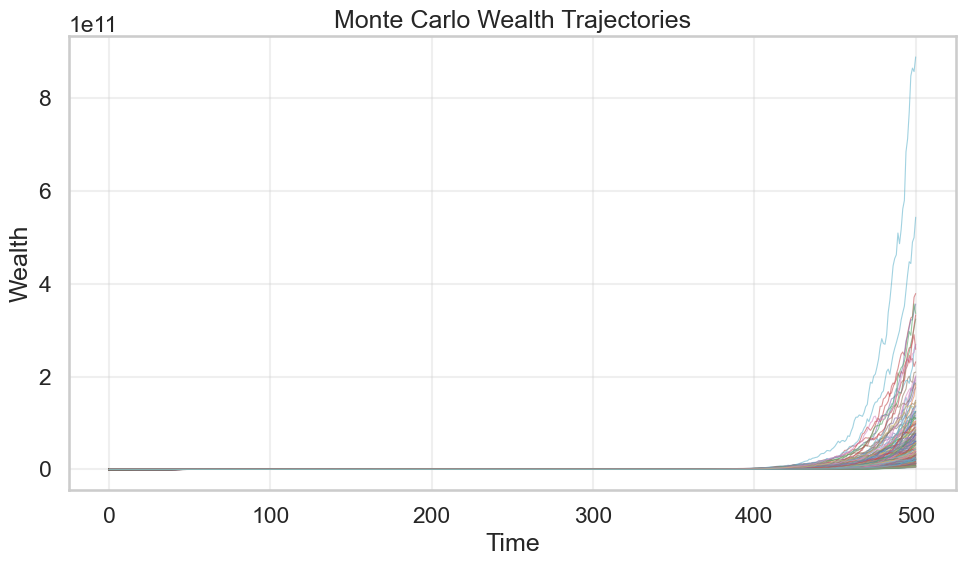

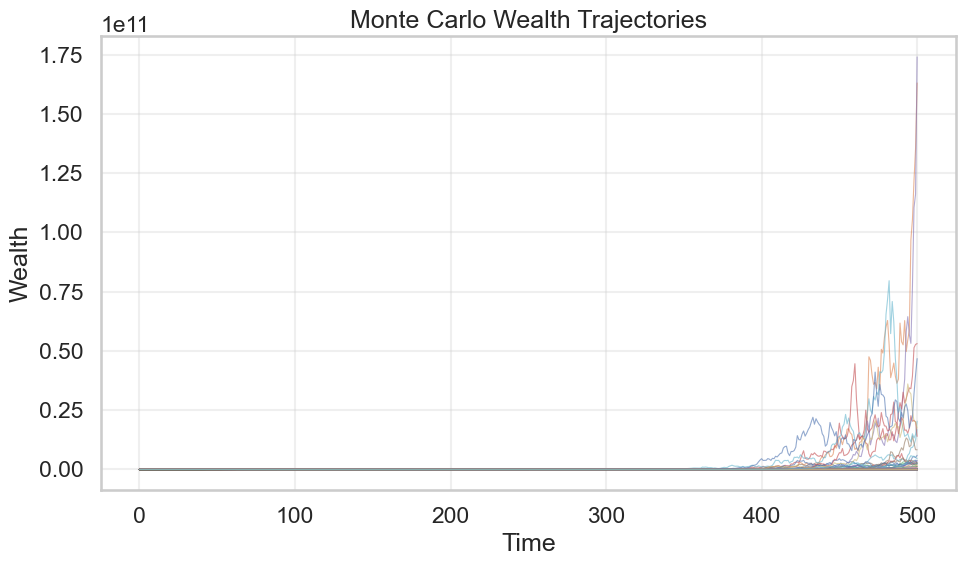

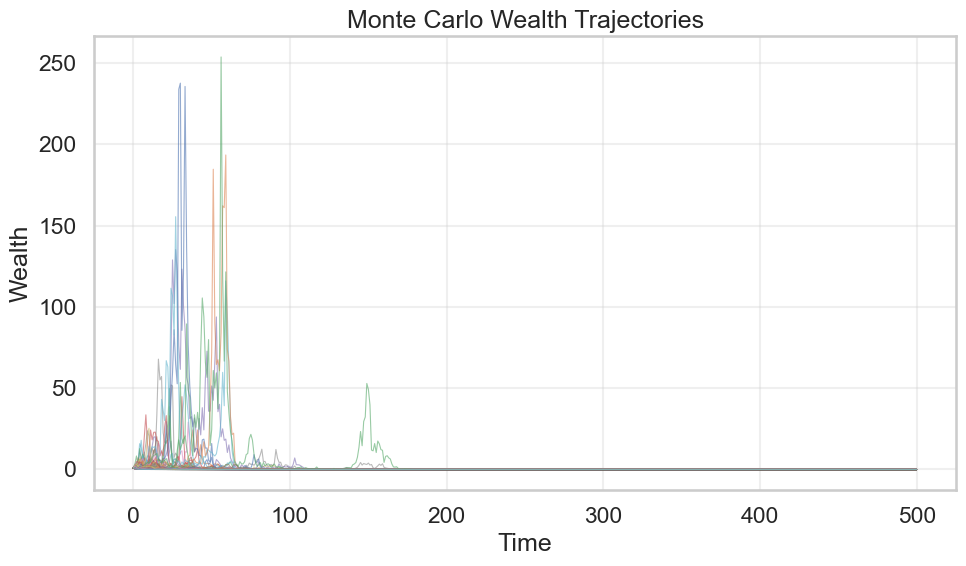

In [10]:
# Visual comparison across volatility regimes

plot_fan_chart(results_low)    # low volatility
plot_fan_chart(results)        # medium volatility (baseline)
plot_fan_chart(results_high)   # high volatility

## 2. Global Geometry of Multiplicative Wealth

Các fan chart cho thấy một cấu trúc chung:

- Phân phối wealth lệch phải mạnh theo thời gian.
- Phần lớn quỹ đạo nằm gần vùng giá trị thấp trong hầu hết horizon.
- Một số rất ít quỹ đạo tăng trưởng bùng nổ ở giai đoạn cuối
  và quyết định toàn bộ thang đo của đồ thị.

Điều này hàm ý:

> ensemble expectation có thể bị chi phối bởi
> **tail events xác suất rất nhỏ**.


## 3. Path Divergence and Early Non-Ergodic Signals

Từ fan chart, có thể quan sát:

- Các quỹ đạo bắt đầu gần nhau nhưng **phân kỳ rất nhanh theo thời gian**.
- Một số ít đường đi tăng trưởng mạnh,
  trong khi phần lớn dao động thấp hoặc suy giảm.
- Độ mở của "hình quạt" tăng theo thời gian,
  phản ánh **tích lũy biến động trong hệ nhân**.

Đây là dấu hiệu trực quan đầu tiên cho thấy:

> trung bình theo quần thể sẽ sớm **không đại diện** cho quỹ đạo điển hình.


## 3. Medium Volatility — Baseline Non-Ergodic Structure

Ở mức biến động trung bình:

- Các quỹ đạo phân kỳ rõ ở nửa sau của horizon.
- Phần lớn đường đi vẫn cùng bậc độ lớn khá lâu.
- Một số ít quỹ đạo tách ra theo tăng trưởng hàm mũ ở cuối.

Diễn giải:

- Ensemble mean bắt đầu bị kéo lên bởi tail paths.
- Median trajectory tăng chậm hơn đáng kể.
- Non-ergodicity **đã xuất hiện nhưng chưa cực đoan**.


## 4. High Volatility — Extreme Tail Dominance

Khi biến động cao:

- Phân kỳ xảy ra sớm và tăng theo cấp số nhân.
- Đa số quỹ đạo dao động thấp hoặc suy giảm tương đối.
- Một số cực ít đường đi đạt giá trị lớn hơn phần còn lại nhiều bậc độ lớn.

Hệ quả:

- Ensemble mean bị chi phối gần như hoàn toàn bởi tail events.
- Quỹ đạo điển hình không phản ánh mức tăng trưởng này.

Đây là biểu hiện trực quan mạnh của:

> **non-ergodicity trong hệ tăng trưởng nhân biến động cao**.


## 5. Low Volatility — Delayed Dispersion

Ở biến động thấp:

- Phân kỳ xuất hiện muộn hơn theo thời gian.
- Các quỹ đạo duy trì gần nhau trong phần lớn horizon.
- Tăng trưởng bùng nổ hiếm hơn và ít thống trị ensemble.

Điều này cho thấy:

- Log-growth trung bình vẫn dương hoặc gần 0.
- Non-ergodicity tồn tại nhưng yếu hơn đáng kể.


## 6. From Path Geometry to Non-Ergodicity

Một mâu thuẫn cốt lõi xuất hiện:

- Mean wealth có thể tăng mạnh nhờ các quỹ đạo hiếm.
- Nhưng phần lớn quỹ đạo không tăng trưởng tương ứng.

Đây chính là sự khác biệt giữa:

- **ensemble average**
- **time-average growth**

trong hệ tăng trưởng nhân.


## 7. Transition to Statistical Quantification

Phase III đã cung cấp bằng chứng trực quan về:

- phân kỳ cấp số nhân,
- tail dominance,
- non-representative ensemble mean.

Bước tiếp theo là đo lường định lượng:

- so sánh mean vs median,
- tính log-growth dài hạn,
- ước lượng xác suất sống sót.

Đây là nội dung trung tâm của:

# Phase IV — Ensemble vs Time-Average Outcomes
